In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
data = pd.read_csv('./Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
nan_check = data.isnull().values.any()
print("NaN check:", nan_check)

NaN check: False


In [7]:
data= data.select_dtypes(['float64','int64','int32'])
data

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [8]:
data = data.apply(np.log1p)
data

,price,area,bedrooms,bathrooms,stories,parking
0,16.403275,8.912069,1.609438,1.098612,1.386294,1.098612
1,16.321037,9.100637,1.609438,1.609438,1.609438,1.386294
2,16.321037,9.206433,1.386294,1.098612,1.098612,1.098612
3,16.318175,8.922792,1.609438,1.098612,1.098612,1.386294
4,16.250001,8.912069,1.609438,0.693147,1.098612,1.098612
...,...,...,...,...,...,...
540,14.414348,8.006701,1.098612,0.693147,0.693147,1.098612
541,14.384879,7.783641,1.386294,0.693147,0.693147,0.000000
542,14.375127,8.194506,1.098612,0.693147,0.693147,0.000000
543,14.375127,7.976252,1.386294,0.693147,0.693147,0.000000


<Axes: xlabel='price', ylabel='Density'>

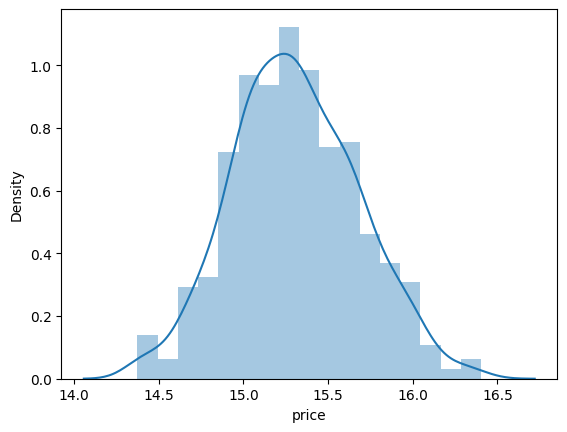

In [10]:
sns.distplot(data['price'])

In [11]:
X= data.drop(['price'],axis=1)
Y= data['price']

In [13]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X.iloc[:500], Y.iloc[:500], test_size=0.2, random_state=42)
X_dev, X_test, Y_dev, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

In [24]:
num_features = X_train.shape[1]

In [28]:
model= keras.Sequential()
model.add(keras.layers.Input(shape=(num_features,)))
model.add(layers.Dense(5, activation='linear'))
model.add(layers.Dense(3, activation='linear'))
model.add(layers.Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='adam', loss='mean_squared_error') 

In [30]:
model.fit(X_train,Y_train,epochs=1000,batch_size=32)

Epoch 1/1000
13/13 [==============================] - 1s 3ms/step - loss: 305.3132
Epoch 2/1000
13/13 [==============================] - 0s 3ms/step - loss: 259.8479
Epoch 3/1000
13/13 [==============================] - 0s 3ms/step - loss: 220.0773
Epoch 4/1000
13/13 [==============================] - 0s 3ms/step - loss: 185.5753
Epoch 5/1000
13/13 [==============================] - 0s 3ms/step - loss: 155.8039
Epoch 6/1000
13/13 [==============================] - 0s 3ms/step - loss: 129.9077
Epoch 7/1000
13/13 [==============================] - 0s 3ms/step - loss: 107.3319
Epoch 8/1000
13/13 [==============================] - 0s 4ms/step - loss: 87.6380
Epoch 9/1000
13/13 [==============================] - 0s 3ms/step - loss: 70.4578
Epoch 10/1000
13/13 [==============================] - 0s 3ms/step - loss: 55.6417
Epoch 11/1000
13/13 [==============================] - 0s 4ms/step - loss: 42.9705
Epoch 12/1000
13/13 [==============================] - 0s 3ms/step - loss: 32.3502
Epoch 

13/13 [==============================] - 0s 3ms/step - loss: 0.2696
Epoch 101/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2693
Epoch 102/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2692
Epoch 103/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2696
Epoch 104/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2695
Epoch 105/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2694
Epoch 106/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2691
Epoch 107/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2699
Epoch 108/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2690
Epoch 109/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2686
Epoch 110/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2686
Epoch 111/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2686
Epoch 112/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.2611
Epoch 199/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2606
Epoch 200/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2608
Epoch 201/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2604
Epoch 202/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2605
Epoch 203/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2604
Epoch 204/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2605
Epoch 205/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2600
Epoch 206/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2604
Epoch 207/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2602
Epoch 208/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2615
Epoch 209/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2599
Epoch 210/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.2496
Epoch 297/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2486
Epoch 298/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2489
Epoch 299/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2483
Epoch 300/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2477
Epoch 301/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2494
Epoch 302/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2485
Epoch 303/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2490
Epoch 304/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2483
Epoch 305/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2498
Epoch 306/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2471
Epoch 307/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2480
Epoch 308/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.2329
Epoch 395/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2349
Epoch 396/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2323
Epoch 397/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2319
Epoch 398/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2330
Epoch 399/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2346
Epoch 400/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2313
Epoch 401/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2344
Epoch 402/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2332
Epoch 403/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2312
Epoch 404/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2313
Epoch 405/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2305
Epoch 406/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.2124
Epoch 493/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2082
Epoch 494/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2095
Epoch 495/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2098
Epoch 496/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2088
Epoch 497/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2090
Epoch 498/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2093
Epoch 499/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2081
Epoch 500/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2074
Epoch 501/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2088
Epoch 502/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2076
Epoch 503/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2079
Epoch 504/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.1778
Epoch 591/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1813
Epoch 592/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1774
Epoch 593/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1831
Epoch 594/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1820
Epoch 595/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1791
Epoch 596/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1824
Epoch 597/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1770
Epoch 598/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1767
Epoch 599/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1751
Epoch 600/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1782
Epoch 601/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1776
Epoch 602/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.1417
Epoch 689/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1411
Epoch 690/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1517
Epoch 691/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1414
Epoch 692/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1519
Epoch 693/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1534
Epoch 694/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1408
Epoch 695/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1399
Epoch 696/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1365
Epoch 697/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1387
Epoch 698/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1425
Epoch 699/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1411
Epoch 700/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.1099
Epoch 787/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1059
Epoch 788/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1084
Epoch 789/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1079
Epoch 790/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1089
Epoch 791/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1124
Epoch 792/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1025
Epoch 793/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1029
Epoch 794/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1016
Epoch 795/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1017
Epoch 796/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1030
Epoch 797/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1009
Epoch 798/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.0766
Epoch 885/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0765
Epoch 886/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0745
Epoch 887/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0752
Epoch 888/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0773
Epoch 889/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0785
Epoch 890/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0746
Epoch 891/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0738
Epoch 892/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0738
Epoch 893/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0782
Epoch 894/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0772
Epoch 895/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0743
Epoch 896/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.0594
Epoch 983/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0565
Epoch 984/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0601
Epoch 985/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0563
Epoch 986/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0564
Epoch 987/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0590
Epoch 988/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0556
Epoch 989/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0586
Epoch 990/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0591
Epoch 991/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0565
Epoch 992/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0555
Epoch 993/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0568
Epoch 994/1000
13/1

In [32]:
model.evaluate(X_dev,Y_dev)

2/2 [==============================] - 0s 3ms/step - loss: 0.0703


0.07028625905513763

In [33]:
predict= model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [34]:
predict

array([[15.616227 ],
       [15.05532  ],
       [15.245536 ],
       [15.695025 ],
       [15.72053  ],
       [15.767996 ],
       [15.357692 ],
       [15.327638 ],
       [15.692037 ],
       [15.297561 ],
       [15.640059 ],
       [14.936728 ],
       [15.289023 ],
       [15.465234 ],
       [14.998532 ],
       [15.456143 ],
       [15.353101 ],
       [16.062187 ],
       [15.175212 ],
       [15.497857 ],
       [15.424294 ],
       [15.016003 ],
       [14.989306 ],
       [14.945544 ],
       [15.016035 ],
       [15.123055 ],
       [15.060847 ],
       [15.525821 ],
       [15.087549 ],
       [15.55253  ],
       [15.652315 ],
       [15.793287 ],
       [15.299014 ],
       [15.441461 ],
       [15.2356415],
       [14.997073 ],
       [15.28744  ],
       [15.782254 ],
       [15.0090475],
       [15.192689 ],
       [15.492098 ],
       [15.887468 ],
       [15.761717 ],
       [15.069139 ],
       [15.762195 ],
       [14.998532 ],
       [15.810066 ],
       [15.11